#  Advanced Predictive Analysis on UCI Heart Disease Dataset: A Binary Classification Approach 🏥
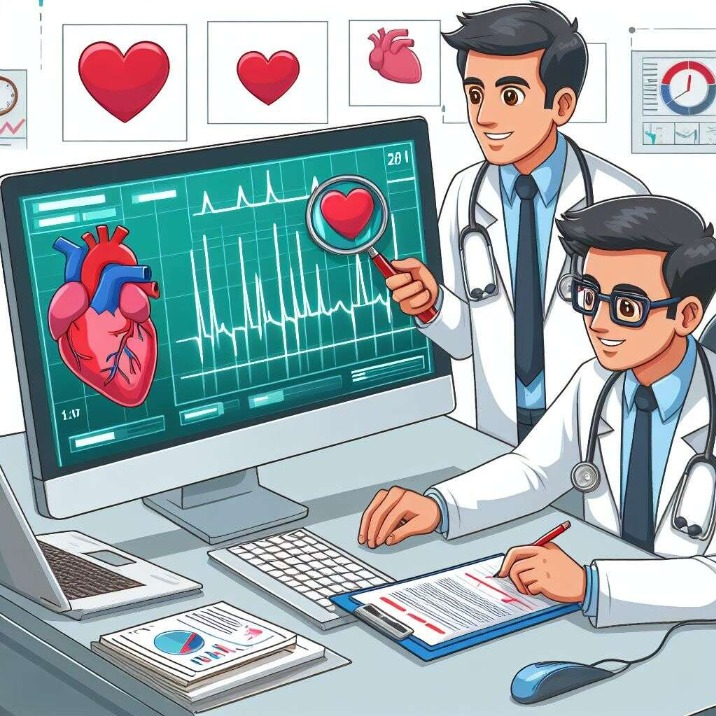
* Author: [Hammad Zahid](https://www.kaggle.com/hammadzahid)
* Contact:
    - [Kaggle](https://www.kaggle.com/hammadansari7)
    - [Twitter](https://twitter.com/hammadzahid)
    - [Github](https://github.com/hamad-Ansari)
* Email: mrhammadzahi@gmail.com
* Designation: Software Engineer & data science 

## **Goal**

In this notebook, I intend to utilize the UCI Heart Disease Dataset [link uci-heart-disease](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data). My aim is to leverage the UCI Heart Disease Dataset to enhance the predictive analysis of heart disease occurrence. My focus will be on refining our data-driven insights through feature engineering, model selection, and optimization techniques. By employing the power of pipeline transformers and advanced preprocessing methods, I will systematically explore the dataset's predictive potential.

I will be using the following algorithms for the analysis:

  - Logistic Regression
  - Support Vector Machine
  - AdaBoost Classifier
  - XGBoost Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - K-Nearest Neighbors
  - Gradient Boosting Classifier
  - CatBoost Classifier
  - LGBM Classifier
  - GaussianNB

## **Dataset**
The UCI Heart Disease dataset contains a collection of features that are used to predict the presence of heart disease in patients. Each row in the dataset represents a different patient, and the columns represent various attributes related to their health and heart disease status.  The dataset is  collected from 

### **Dataset Overview**

- **Number of Instances:** (total number of patients are 920)
- **Number of Attributes:** (total number of features excluding the target variable are 15)
- **Target Variable:** `num` (indicates the presence of heart disease in the patient)
  - The num variable in the UCI Heart Disease dataset is typically used to indicate the presence and severity of heart disease based on angiographic disease status. The values of num generally range from 0 to 4, with each number representing a different level of severity:

  - 0: No presence of heart disease.
  - 1: Mild or some presence of heart disease.
  - 2: Moderate presence of heart disease.
  - 3: Severe presence of heart disease.
  - 4: Very severe presence of heart disease.

## **Acknowledgements**

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


# Abstract
In this project, I employ the UCI Heart Disease Dataset from Kaggle to develop a machine learning model with enhanced predictive accuracy for heart disease occurrence. My strategy acknowledges the pivotal role of dataset integrity and the potential benefits of domain expertise in understanding input features and their influence on the target variable. While direct collaboration with domain experts was not part of this project, the value of such insights is recognized and considered an ideal in refining feature selection and model training. Converting the multilabel challenge to a binary classification has markedly improved performance, with accuracy soaring from 68-72% to above 84%. Operating within computational limits, I have meticulously tuned each algorithm through Grid Search Cross-Validation to achieve optimal performance given the available resources. The result is robust models that deftly navigate the constraints of computational practicality while delivering superior predictive power.

In [1]:
# Importing all important libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


In [2]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 50)
    print(heading.upper())
    print('-' * 50)

# Load Dataset

In [3]:
# read data
#df = pd.read_csv('../ml_examples/data/heart_disease_uci.csv')
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Dataset Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# 1.1. Shape of the Data <a class="anchor"  id="shape-of-the-data"></a>

The dataset consists of records for 920 patients, each with 16 features. Below is the summary of the dataset's dimensions:

| Description | Count |
|-------------|-------|
| Patients    | 920   |
| Features    | 16    |

# Dataset Summary Information

In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# 1.2.1. Observations:
The dataset provides a detailed view into heart disease research with the following characteristics:

  1. Entries and Features: There are `920 entries` each described by `16 features`.
  2. Complete Data: Data completeness is observed in the following columns: `'id', 'age', 'sex', 'dataset', 'cp'`, and the target `'num'`.
  3. Significant Missing Data:
    - 'ca': `66.41%` data missing.
    
I will evaluate provide further analysis on the missingness of the data later in the data preprocessing section in this notebook.

# 1.3. Inspecting Labels of Categorical Variables

In [6]:
# Select the categorical variables
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
value_counts_dict = {}

# Get the value count 
for variable in categorical_variables:
    value_counts_dict[variable] = df[variable].value_counts()

# Initialize an empty list to store the data
data_list = []

# Append a tuple to the list for each category
for variable, counts in value_counts_dict.items():
    for category, count in counts.items():
        data_list.append((variable, category, count))
        
# Append an empty tuple to create a gap between variables
    data_list.append(("---", "---", "---"))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])

# Make the variable column as an index
value_counts_df = value_counts_df.set_index('Variable')

# Display the DataFrame
value_counts_df

,Category,Count
Variable,,
sex,Male,726
sex,Female,194
---,---,---
dataset,Cleveland,304
dataset,Hungary,293
dataset,VA Long Beach,200
dataset,Switzerland,123
---,---,---
cp,asymptomatic,496


# 1.3.1. Observation:
Observing the provided value counts for different categorical variables in this dataset, here are three notable points regarding class balance or imbalance:

1. **Sex Distribution Imbalance**: There is a significant imbalance in the distribution of the `'sex'` variable, with `726` instances of `'Male'` compared to `194` for `'Female'`. This suggests that the dataset may be more reflective of male patients, which could introduce a gender bias in any analysis or predictive modeling.

2. **Chest Pain Type (cp) Variability**: Within the `'cp'` (chest pain type) variable, there is a notable imbalance. `'Asymptomatic'` chest pain is the most common with `496` occurrences, which is more than twice as often as `'non-anginal' (204 occurrences)` and `'atypical angina' (174 occurrences)`, and over ten times more common than `'typical angina' (46 occurrences`)`. This disparity could impact the model's ability to predict heart disease for less common chest pain types due to fewer training examples.

3. **Thalassemia Test Results Distribution**: When looking at the `'thal'` (thalassemia) test results, we see a relatively balanced count between `'normal' (196)` and `'reversable defect' (192)`, but `'fixed defect' `is underrepresented with only `46` instances. This imbalance could potentially skew predictive outcomes towards the more commonly represented categories, potentially affecting the model's diagnostic accuracy for patients with a `'fixed defect`'.

# 1.4. Inspecting Labels of Target Variable

In [7]:
num_df = df['num'].value_counts()
pd.DataFrame(num_df)

,count
num,
0,411
1,265
2,109
3,107
4,28


# 1.4.1. Observation:
The 'num' variable distribution in the dataset shows a clear imbalance, with a majority of cases having no presence of heart disease `('0': 411 cases)` and progressively fewer cases as the severity level increases, with the highest severity `('4') having only 28 cases`. This imbalance can bias a model towards predicting no disease presence, making it difficult to detect more severe conditions due to fewer examples. Therefore, converting this multiclass problem into a binary classification (presence vs. absence of heart disease) is a strategic choice that simplifies the task, potentially enhancing model performance and focusing on the clinically important distinction of detecting heart disease.

More on the binary classification transformation later in this notebook.

# 1.5. Correlation Matrix

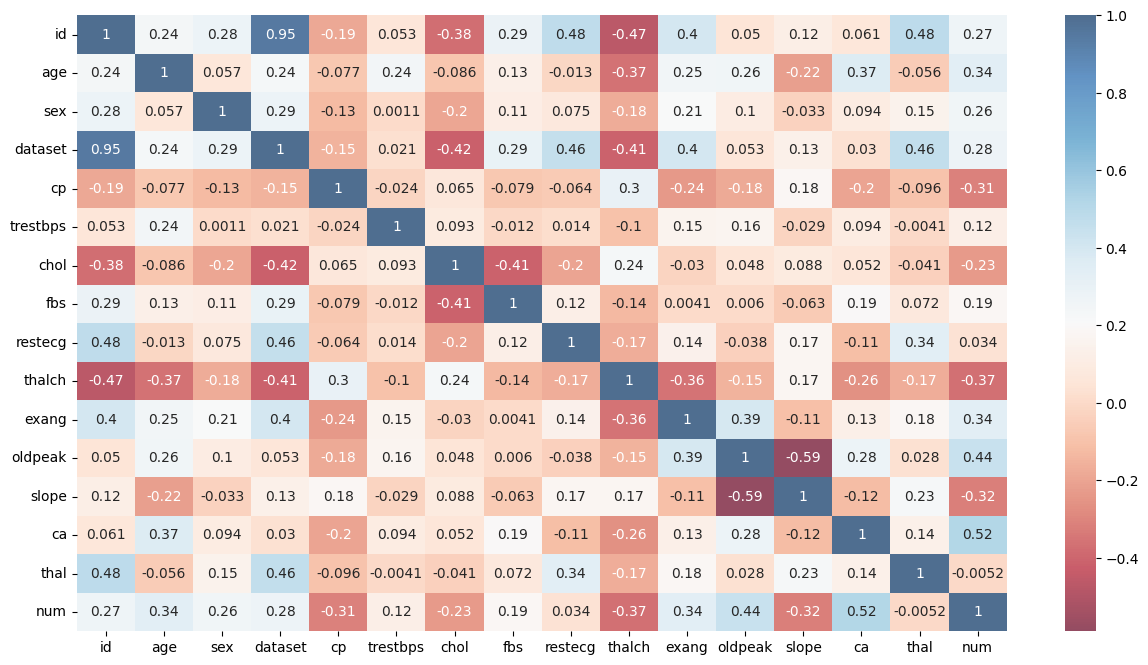

In [8]:
# plot correlation matrix after converting categorical columns to numerical
# convert categorical columns to numerical using label encoding
df2 = df.copy()
sns.set_palette("pastel")
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])


correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index 
#plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, square=False)
plt.show()

In [9]:
# calculate the correlation of each feature with the target variable and sort in descending order
correlation = correlation_matrix['num'].sort_values(ascending=False)
print_heading('Correlation of each feature with the target variable')
correlation

--------------------------------------------------
CORRELATION OF EACH FEATURE WITH THE TARGET VARIABLE
--------------------------------------------------


num         1.000000
ca          0.516216
oldpeak     0.443084
age         0.339596
exang       0.338166
dataset     0.276203
id          0.273552
sex         0.259342
fbs         0.186664
trestbps    0.122291
restecg     0.034255
thal       -0.005170
chol       -0.231547
cp         -0.314518
slope      -0.318383
thalch     -0.366265
Name: num, dtype: float64

# 1.5.1. Observations
High positive coefficients (e.g., ca, oldpeak, age, exang) suggest that as these feature values increase, the likelihood of an increase in num is higher, indicating a strong direct relationship. Conversely, high negative coefficients (e.g., cp, slope, thalach) suggest that as these features increase, the value of num is likely to decrease, indicating a strong inverse relationship. I will dive deep into this later. 

# 1.6. Historgram of all features


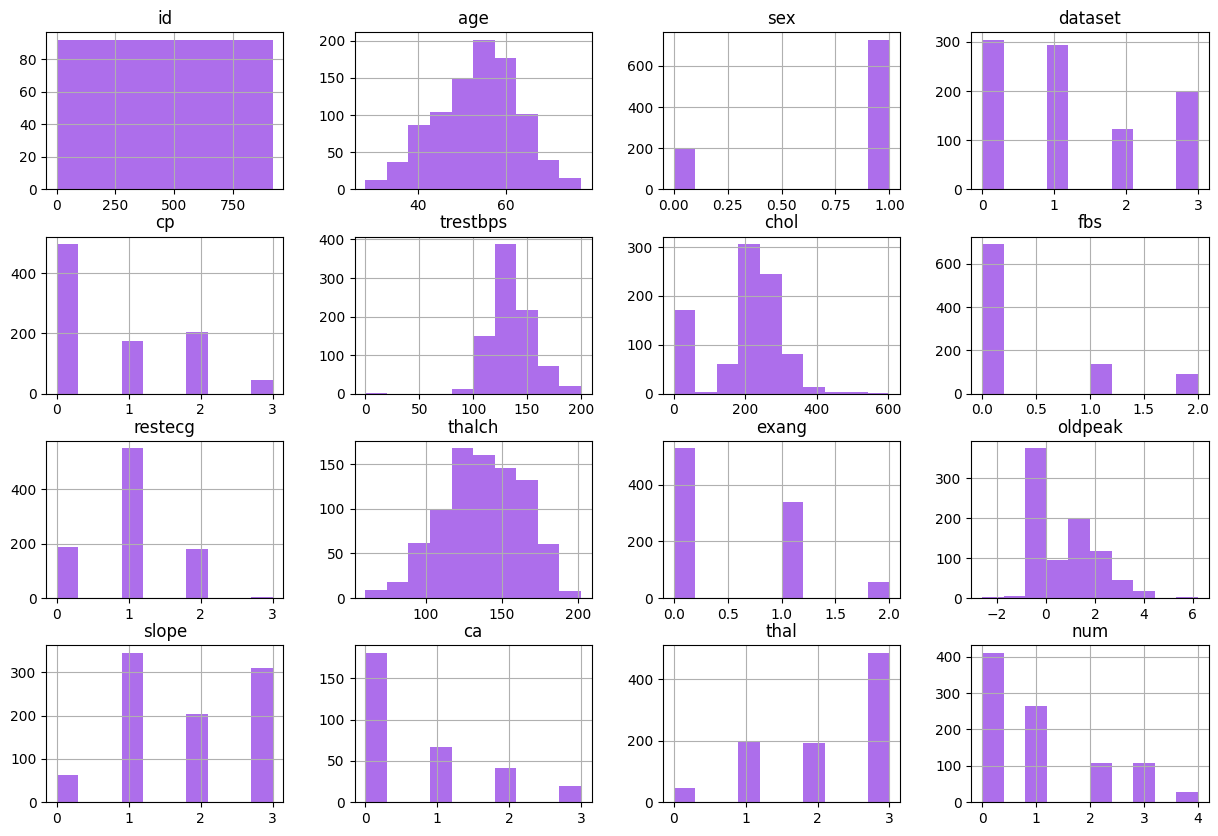

In [10]:
# plot histogram of all columns using sns
df2.hist(figsize=(15, 10), color='#8B30E3', alpha=0.7)

plt.show()

# 1.7. Histograms of Selected Clinical Attributes (Continous Numerical) Grouped by Target Category

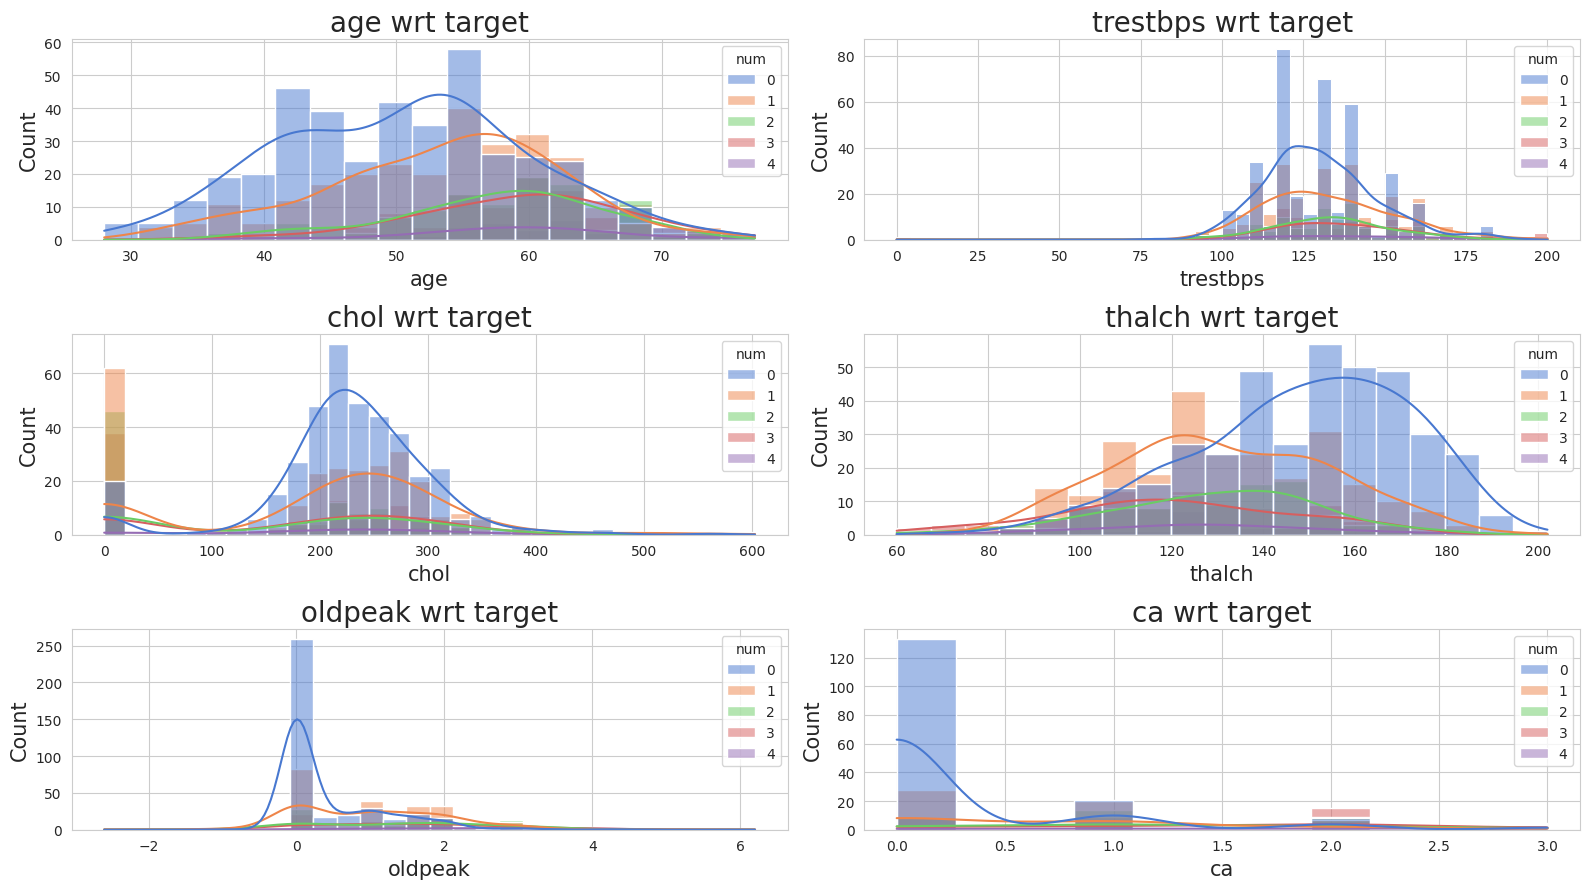

In [11]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define your color palette
color_palette = sns.color_palette("muted", len(df['num'].unique()))

# Specify the columns you want to plot manually
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculate the number of rows needed based on the number of specified columns
num_plots = len(columns)  # The actual number of plots you want to create
num_rows = (num_plots + 1) // 2  # Add 1 to ensure that we have enough rows for all columns

# Set up the matplotlib figure grid
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 3))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over the specified columns to create individual plots
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, kde=True, hue='num', palette=color_palette, ax=axes[i])
    axes[i].set_title(f'{column} wrt target', fontsize=20)
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel('Count', fontsize=15)

# Remove any excess subplots if the number of specified columns is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better fit and to reduce any overlapping
plt.tight_layout()
plt.show()

# 1.8. How strongly do the independent variables predict the dependent or target variable 'num'?

I will be analyzing the relationship between the independent categorical variables and the dependent variable 'num'. I will now investigate whether there is a statistically significant association between the `independent catergorical variables (X)` and the `dependent variable 'num' (Y)`, and to understand the nature of their relationship. 

In [12]:
# Group 'fbs' column and provide descriptive statistics for the 'num' column within each group.
df.groupby('fbs')['num'].describe()

,count,mean,std,min,25%,50%,75%,max
fbs,,,,,,,,
False,692.0,0.868497,1.117570,0.0,0.0,0.0,1.0,4.0
True,138.0,1.347826,1.218184,0.0,0.0,1.0,2.0,4.0


In [13]:
# Group 'exang' column and provide descriptive statistics for the 'num' column within each group.
df.groupby('exang')['num'].describe()

,count,mean,std,min,25%,50%,75%,max
exang,,,,,,,,
False,528.0,0.623106,0.997148,0.0,0.0,0.0,1.0,4.0
True,337.0,1.522255,1.107447,0.0,1.0,1.0,2.0,4.0


In [14]:
# Group 'slope' column and provide descriptive statistics for the 'num' column within each group.
df.groupby('slope')['num'].describe()

,count,mean,std,min,25%,50%,75%,max
slope,,,,,,,,
downsloping,63.0,1.746032,1.319436,0.0,1.0,2.0,3.0,4.0
flat,345.0,1.353623,1.108710,0.0,1.0,1.0,2.0,4.0
upsloping,203.0,0.689655,1.042294,0.0,0.0,0.0,1.0,4.0


In [15]:
# Group 'ca' column and provide descriptive statistics for the 'num' column within each group.
df.groupby('ca')['num'].describe()

,count,mean,std,min,25%,50%,75%,max
ca,,,,,,,,
0.0,181.0,0.453039,0.903237,0.0,0.0,0.0,1.00,4.0
1.0,67.0,1.298507,1.180844,0.0,0.0,1.0,2.00,4.0
2.0,41.0,1.902439,1.241066,0.0,1.0,2.0,3.00,4.0
3.0,20.0,2.300000,1.417930,0.0,1.0,2.5,3.25,4.0


# 1.8.5.1. What do the descriptive statistics reveal about the behavior of 'num' across the various levels of 'ca'? Are there observable trends suggesting a relationship?

In the context of statistical analysis, where `'num'` is the dependent variable (Y) and `'ca'` is one of the independent variables (X). As we know from the correlation matrix that there exists a strong correlation between these two. Futhermore, the above table suggests the following relationship between X ('ca') and Y ('num'):

- For `X = 0.0`: The mean of Y is approximately `0.45`, which suggests a tendency for Y to be closer to 0 when X is 0.
- For `X = 1.0`: The mean of Y increases to about `1.3`. This indicates that when X is 1, the average value of Y is higher, suggesting a possible positive association.
- For `X = 2.0`: The mean of Y is roughly `1.90`, which further suggests that as X increases, there is a trend toward higher values` of Y.
- For `X = 3.0`: The mean of Y is the highest at `2.30` among the groups, indicating a potential trend where higher values of X are associated with higher values of Y.

The pattern of increasing mean values of Y with higher values of X confirms a positive correlation between the independent variable 'ca' and the dependent variable 'num'. However, establishing the strength and significance of this relationship would require additional statistical testing.

The 25th, 50th (median), and 75th percentiles provide a deeper understanding of Y's distribution for each category of X. Notably, for X values of `2.0` and `3.0`, at least `75%` of the observations result in Y being `3.0` and `3.25` suggesting higher heart disease detection.

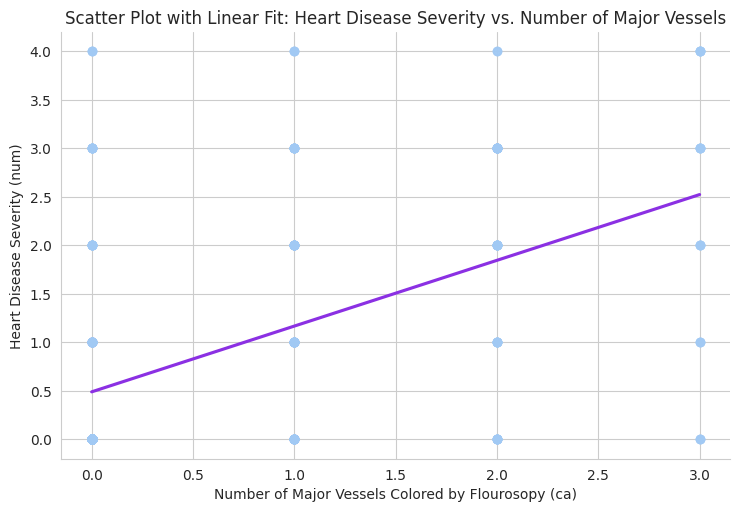

In [16]:
# Create a plot with a linear fit to show any trends between 'ca' and 'num'.
sns.lmplot(x='ca', y='num', data=df, aspect=1.5, ci=None, order=1,  line_kws={'color': '#8B30E3'})

plt.title('Scatter Plot with Linear Fit: Heart Disease Severity vs. Number of Major Vessels')
plt.xlabel('Number of Major Vessels Colored by Flourosopy (ca)')
plt.ylabel('Heart Disease Severity (num)')

plt.show()

# 1.8.5.2. Plotting Violin graph of Heart Disease Severity by Number of Major Vessels

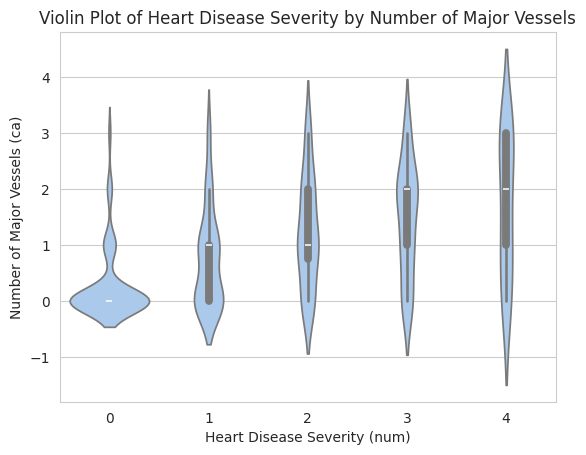

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the violin plot

sns.violinplot(x='num', y='ca', data=df)
# Set the title and labels
plt.title('Violin Plot of Heart Disease Severity by Number of Major Vessels')
plt.ylabel('Number of Major Vessels (ca)')
plt.xlabel('Heart Disease Severity (num)')

# Display the plot
plt.show()

# 1.8.5.2.1. **Observation**:
Each 'violin' represents one `'ca'` category and shows the distribution of `'num'` values. The width of the violin at different 'num' values indicates the density of the data, giving a visual sense of the distribution. The white dot represents the median, and the thick bar in the center of the violin indicates the interquartile range.

# **2.0. Data Preprocessing**

# 2.1. Can Cholestrol be zero?

Cholesterol is a critical component of cell membranes and is necessary for the production of certain hormones and vitamin D. A zero cholesterol level in the blood is **medically impossible** because it is essential for basic cellular functions and overall bodily health. The absence of cholesterol would result in cellular dysfunction and is incompatible with life.

Reference:
American Heart Association. (n.d.). What Is Cholesterol? Retrieved January 15, 2024,
[What is Cholestrol?](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol)

# 2.1.0. Dealing with Zero Values in Cholesterol Data: A Strategy for Data Integrity

In [18]:
# Check for all zero cholestrol values
len(df[df['chol'] == 0])
# calculate the percentage of zero values in the column
zero_percentage = len(df[df['chol'] == 0]) / df.shape[0] * 100
print_heading("Percentage of zero Cholesterol values: {:.2f}%".format(zero_percentage))

--------------------------------------------------
PERCENTAGE OF ZERO CHOLESTEROL VALUES: 18.70%
--------------------------------------------------


In [19]:
# replace zero values with NaN in cholestrol column
df['chol'] = df['chol'].replace(0, np.nan)

In [20]:
# calculate the percentage of missing values in the column
missing_percentage = df['chol'].isnull().sum() / df.shape[0] * 100
missing_percentage = round(missing_percentage, 2)
print_heading("Percentage of missing Cholesterol values: {:.2f}%".format(missing_percentage))

--------------------------------------------------
PERCENTAGE OF MISSING CHOLESTEROL VALUES: 21.96%
--------------------------------------------------


# 2.2. What happens if we don't handle missing values?

# 2.2.1. What are missing values?
Missing values are defined as the data points in the dataset that are not present or have not been recorded. They can occur due to various reasons such as errors in data collection, failure to fill in a value, or when an observation is not applicable or available.

If missing values are not handled, it can lead to skewed or incorrect analysis results because many algorithms cannot process `undefined` or `missing` or `unpresentable` values and may produce errors. Additionally, models trained on incomplete data may be biased or less accurate, undermining the reliability of predictions or inferences drawn from the dataset.

# 2.2.2. Identifying Missing values
Before addressing the missing values, it’s crucial to identify them within the dataset. This section focuses on techniques for detecting missing values via using descriptive statistics and visualization tools to summarize and highlight the presence of NaN values.

In [21]:
# Displaying the percentages of the missing values in each column
print_heading("Percentage of missing values in each column")
feature_percent = round(((df.isnull().sum() / len(df)) * 100 ).sort_values(ascending=False),2)

# add % sympbol
feature_percent = feature_percent.astype(str) + '%'
feature_percent


--------------------------------------------------
PERCENTAGE OF MISSING VALUES IN EACH COLUMN
--------------------------------------------------


ca          66.41%
thal        52.83%
slope       33.59%
chol        21.96%
fbs          9.78%
oldpeak      6.74%
trestbps     6.41%
thalch       5.98%
exang        5.98%
restecg      0.22%
cp            0.0%
dataset       0.0%
id            0.0%
age           0.0%
sex           0.0%
num           0.0%
dtype: object

# 2.2.3. Observation:
The dataset exhibits significant missingness, particularly in the `'ca' and 'thal'` columns, with `66.41% and 52.83%` of their values missing, respectively. Other attributes with notable missing data include `'slope' (33.59%)`, `'fbs' (9.78%)`, and `'oldpeak' (6.74%)`, while many other features have no missing values. Moreover, the missing values in `chol` are increased from `3.26%` to `21.96%` as we have converted the `18.70%` of the zero values to missing values in the previous section.

# 2.2.4. Ploting heatmap for missing values

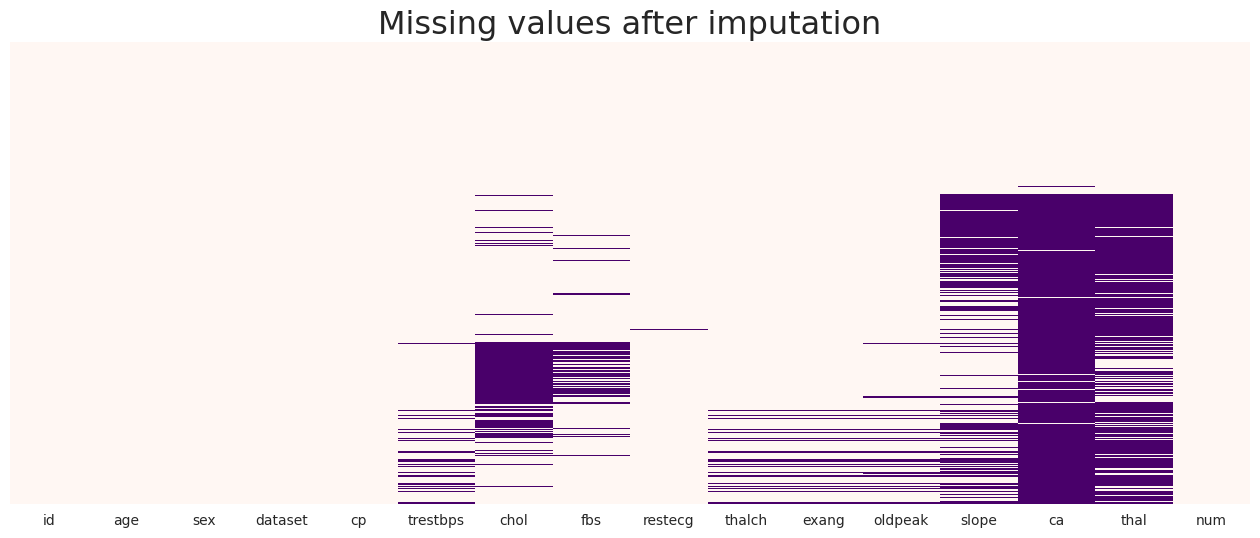

In [22]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

# 2.3. Implementing Simple Imputation for Minor Data Gaps
# 2.3.1. Addressing Missing Values Below 20%
In instances where the missing data constitutes less than 20% of the dataset, I'll deploy the following two imputation techniques:

  * Simple imputation
  * KNN imputation

`Simple imputation` is a process where missing values are filled in using a basic statistical measure from the observed data points—typically the mean, median, or mode. This approach is straightforward and effective for minor gaps, preserving the dataset's overall structure without introducing significant bias.

`KNN Imputation` K-Nearest Neighbors (KNN) imputation is a method for filling in missing values in a dataset by finding the 'K' closest neighbors to the observation with missing data and imputing values using the mean or median of these neighbors. This technique assumes that similar data points can be found within the dataset and uses their values to estimate the missing ones, which can be more accurate than simple imputation methods when the data points have a discernible pattern or correlation.

# 2.3.2. Tackling Significant Missingness
For variables with missing data surpassing the 20% threshold, a more sophisticated approach is required. Here, predictive imputation comes into play, where a Random Forest algorithm.

`Random Forest Algorithm` is a versatile machine learning model that operates by constructing multiple decision trees and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees—will be used to estimate and fill in the missing values. This model will be trained on parts of the data where the variables are observed, then used to predict the missing values in columns like `'ca', 'slope'`, and `thal` and others with substantial missingness.

# 2.3.3. Applying the SimpleImputer and KNN Imputer method to handle smaller percentages of missing values

# 2.3.3.1 KNNImputer on Cholstrol with 18% missing values

In [23]:
# Import KNNImputer from sklearn.impute
from sklearn.impute import KNNImputer

# Initialize KNNImputer with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)

# Use KNNImputer to fill missing values in 'chol' column
df['chol'] = imputer.fit_transform(df[['chol']])

# Convert 'chol' column to integer type
df['chol'] = df['chol'].astype(int)

# 2.3.3.2. SimpleImputer on the features with less than 10% missing values

In [24]:
# Automatically find numerical and categorical columns with missing values less than 10%
missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# list of numerical columns that have less than a certain threshold of missing values and are not the target variable.
numerical_cols = [
    col 
    for col in df.columns 
    if (
        (df[col].dtype in ['int64', 'float64']) and 
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold  and
        (col != target_variable)
       
    )
]

# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = [col
                   for col in df.columns 
                   if (
                        df[col].dtype == 'object') and 
                        (df[col].isnull().sum() / total_entries * 100) < missing_threshold]

# Apply simple imputation to numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

print_heading('Observations from missing values after imputation'.upper())

# Confirm there are no missing values left
missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()

print(f"The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}"  + "\n")
print_heading('High missing values features'.upper())

# Display the features with missing values 
print(f"The sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")
    

--------------------------------------------------
OBSERVATIONS FROM MISSING VALUES AFTER IMPUTATION
--------------------------------------------------
The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64

--------------------------------------------------
HIGH MISSING VALUES FEATURES
--------------------------------------------------
The sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


# 2.3.4. Heatmap for missing values

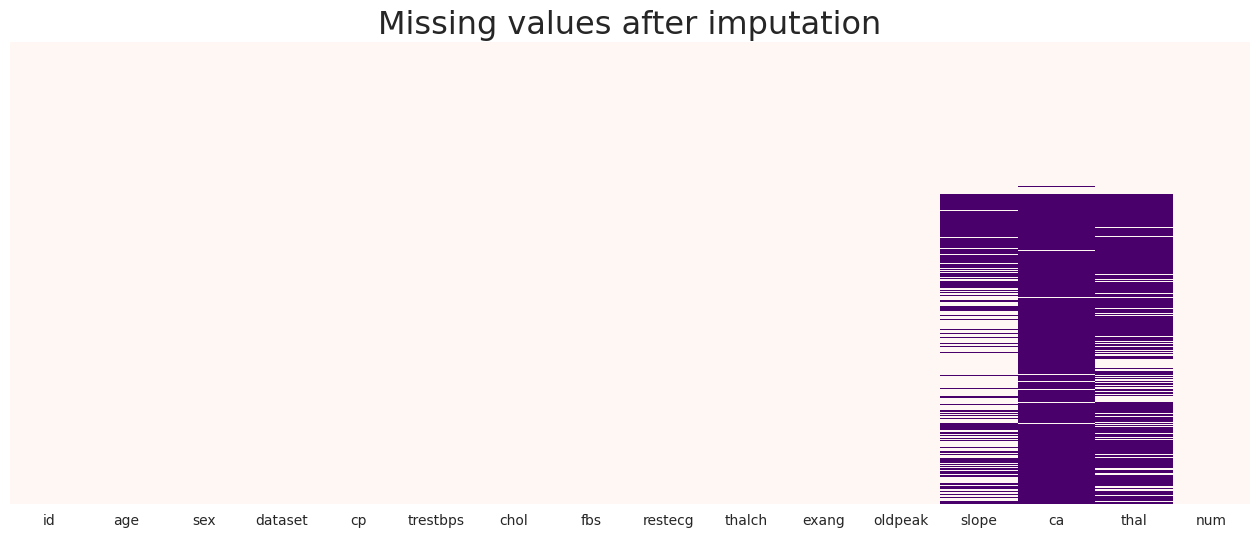

In [25]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

# 2.3.5. Observation
Currently, only three variables remain with a substantial proportion of missing values. As mentionned above, to address this, I will employ the `Random Forest algorithm` to estimate the missing data. By training a model specifically for this purpose, I aim to predict the missing entries that exhibit high rates of absence. Once predictions are made, I will integrate these estimations back into the DataFrame to complete the imputation process.
# 2.3.6. Strategy
I plan to tackle the imputation of missing values in features that have a significant amount of data missing by leveraging the `Random Forest algorithm`. My strategy is to divide the dataset into two subsets: the first will consist of records without missing values, and the second will contain the instances with missing values in the pertinent features. I will utilize the first subset to train the Random Forest model. Once the model is adequately trained, I will apply it to the second subset, which has the missing values, to predict those values. Finally, I will merge these predictions back into the original dataset, thereby replacing the missing entries with the imputed values.

Here are the steps:

1. Separate the Data: Split your dataset into two subsets:
    - Subset A: Rows without any missing values in the high-missing-rate features.
    - Subset B: Rows with missing values in those particular features.
  
2. Train the Model: Use Subset A to train the Random Forest model. The features with complete data will be used as predictors, while the feature you're imputing will be the target variable.

3. Predict Missing Values: Apply the trained Random Forest model to Subset B to predict the missing values. Only use the rows with missing values for the prediction to fill in the gaps.

4. Impute the Data: Take the predictions for the missing values and use them to impute the missing data in Subset B. This step merges the predicted values back into the original dataset.

5. Recombine the Data: Concatenate Subset A and the now imputed Subset B to reconstruct the complete dataset with all the previously missing values imputed.

In [26]:
# split the dataset into two subset with one contaning complete data and the other containing 
# missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# create a new dataframe which removes all the rows that nan values
df_clean = df.dropna()

# create a new dataframe which contains all the rows that have nan values
df_missing = df[df.isna().any(axis=1)]

print_heading('Complete data with no missing values'.upper())
print(f"The shape of the complete dataframe is: {df_clean.shape}")
print("\n")
print_heading('Missing data with high missing values'.upper())
print(f"The shape of the dataframe with missing values is: {df_missing.shape}")

--------------------------------------------------
COMPLETE DATA WITH NO MISSING VALUES
--------------------------------------------------
The shape of the complete dataframe is: (299, 16)


--------------------------------------------------
MISSING DATA WITH HIGH MISSING VALUES
--------------------------------------------------
The shape of the dataframe with missing values is: (621, 16)


# 2.4. Applying Random Forest Algorithm to train the model

In [27]:
# Training and evaluating the model for the target variables 'slope', 'thal', and 'ca'.
def predict_and_evaluate(target_variable, drop_columns):
    # Drop specified columns from the DataFrame
    X = df_clean.drop(drop_columns, axis=1)
    
    # Select target variable(s)
    y = df_clean[target_variable]

    # Initialize LabelEncoder
    le = LabelEncoder()
    
    #le = OneHotEncoder()
    for col in X.columns:
        # If column is of object type
        if X[col].dtype == 'object':
            # Encode the column
            X[col] = le.fit_transform(X[col])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print heading
    print_heading(f'Model performance for {target_variable}'.upper())
    
    # Print accuracy score
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")

    # Print classification report
    print(f"Classification report:\n {classification_report(y_test, y_pred)}")

    # Return the trained model
    return model

# 2.5. Predicting Missing Values with a Trained Model

In our data processing pipeline, we face a dataset, `df_missing`, with a significant number of missing values in the `slope`, `ca`, and `thal` columns. To address this, we undertake the following steps:

1. **Data Preparation**:
   We create a new DataFrame `df_encoded_pred` by dropping the columns with missing values (`slope`, `ca`, and `thal`) from `df_missing`. This step is crucial for preparing the data for prediction by removing the target variables that we aim to predict.

2. **Encoding and Prediction Function**:
We define a function `encode_and_predict` to automate the encoding of categorical features and to use a trained model for predicting the missing values:

   - The function initializes a LabelEncoder for transforming categorical text data into a numerical format suitable for the model.
   - It iterates over each column in the provided DataFrame, applying the label encoder to columns of type object (categorical).
     Finally, it uses the input model to predict values for the specified target variable.

3. **Applying the Trained Model**:
We call the encode_and_predict function, passing in the df_encoded_pred DataFrame, the name of the target variable slope, and the pre-trained model rf_models. These trained model is specifically applied to predict the high number of missing values in the `'slope', 'thal', and 'ca'` column.

4. **Updating the Original Data**:
After predicting the slope values, we update the corresponding column in the original `df_missing` DataFrame with the newly predicted values. This allows us to fill in the gaps in our original dataset.


# 2.6. Imputation Process for Missing Data - My Custom Chained Appoach

# 2.6.1. Imputing `Slope`

1. **Selecting Predictors for `Slope`**
   I start by selecting predictors that have minimal missing values. Excluding `Ca` and `Thalassemia` are my choices, considering their high missing values.

2. **Training a Model for `Slope`**
   I then train a model to estimate the missing `Slope` values.

3. **Imputing `Slope`**
   After the model training, I impute the missing values in `Slope`, ensuring the integrity of the data.

4. **Updating the Dataset with `Slope`**
   Once imputed, I integrate the `Slope` data back into the dataset, reaffirming its completeness.

# 2.6.2. Imputing `Ca`

5. **Repeating the Process for `Ca`**
   Turning my attention to `Ca`, I use the now-complete `Slope` as predictors to impute `Ca`. I train the model myself, considering the new data.

6. **Updating the Dataset with `Ca`**
   With the `Ca` values imputed, I update the dataset myself, ensuring consistency and completeness.

# 2.6.3. Imputing `Thalassemia`

7. **Proceeding with `Thalassemia`**
   Lastly, I address `Thalassemia`. I use the imputed `Slope` and the updated `Ca` to train a model for `Thalassemia`.

8. **Imputing and Updating `Thalassemia`**
   After predicting the missing values for `Thalassemia`, I impute them and integrate them into the dataset, completing the imputation process.

In [28]:
# create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

In [29]:
# Train and evaluate a model for predicting the 'slope' feature, excluding 'slope', 'ca', and 'thal' from the input features.
rf_model_slope  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR SLOPE
--------------------------------------------------
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [30]:
# Train and evaluate a model for predicting the 'ca' feature, excluding 'ca', and 'thal' from the input features.
rf_model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR CA
--------------------------------------------------
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [31]:
# # Train and evaluate a model for predicting the 'thal' feature.
rf_model_thal = predict_and_evaluate('thal', ['thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR THAL
--------------------------------------------------
The accuracy of the model is: 0.7
Classification report:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



# 2.7. Missing Value Prediction from Trained models

In [32]:
def encode_and_predict(df, target_variable, model):

    # Initialize label encoder
    le = LabelEncoder()

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the column is of type 'object' (categorical)
        if df[col].dtype == 'object':
            # encode the categorical data to integers
            df[col] = le.fit_transform(df[col])
    # Use the model to apply predictions and assign the predicted values to the target variable
    df[target_variable] = model.predict(df)


  # 2.7.1. Predicting missing values for ca, slope and thal variables

In [33]:
# Encode categorical features and predict the 'slope' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)
# Update the 'slope' column in df_missing with the predicted values
df_missing.loc[:,'slope'] = df_encoded_pred['slope']

df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)
# Encode categorical features and predict the 'ca' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)
# Update the 'ca' column in df_missing with the predicted values
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']

df_encoded_pred = df_missing.drop(['thal'], axis=1)
# Encode categorical features and predict the 'thal' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)
# Update the 'thal' column in df_missing with the predicted values
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']


# 2.7.2. Merging the datasets

In [34]:
# merge df_clean and df_missing 
df = pd.concat([df_clean, df_missing])

print_heading('Dataset shape inspect'.upper())
print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")

--------------------------------------------------
DATASET SHAPE INSPECT
--------------------------------------------------
The shape of the dataset is: 920 rows and 16 columns.


# 2.7.3. Verification of the trained model

In [35]:
# Display the missing values if any in the dataset for verification
print_heading('Missing values inspect'.upper())
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

--------------------------------------------------
MISSING VALUES INSPECT
--------------------------------------------------
There are no missing values in the dataset.


# 2.9. Observations after imputing all missing values
- The dataset is fully complete with no missing values in any of the columns.
- All columns, including 'id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', and 'num', have 0 missing values.
- This completeness is an ideal scenario for conducting reliable statistical analyses or for input into machine learning models.
- Having no missing values suggests that the data collection process was thorough and that the dataset has been well-prepared for further processing.
- With a complete dataset, we can proceed with confidence in exploring the data, visualizing patterns, and drawing insights.

# 3.0. Why Is Scaling Crucial for Continuous Variables in Heart Disease Prediction?

Scaling in data organization is the process of adjusting the range of variable values to aid in comparison and computation, especially in machine learning models that are sensitive to the magnitude of inputs.

# 3.1. Min-Max Scaling 
It is a normalization technique that transforms continuous numerical data to a specified range, typically [0, 1] or [-1, 1], to ensure consistent scale across features, which can improve the performance and convergence speed of many machine learning algorithms.

# 3.2. In the context of the heart disease dataset
Scaling continuous variables is essential in heart disease prediction to normalize the feature magnitudes, ensuring that each variable contributes equally to the analytical models and improving algorithm performance, particularly in distance-based and gradient descent methods. Therefore, I will be using the min-max scaling of the continuous variables except the `oldpeak` column. Due to the distribution of the `oldpeak` feature, I will be applying binning instead.

In [36]:
from sklearn.preprocessing import MinMaxScaler
# min max scaling to scale the thalch ca chol and tresbps columns
def scale_columns(df, columns):
 
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    for column in columns:
        df[column] = scaler.fit_transform(df[[column]])
    
    return df

df = scale_columns(df, ['thalch', 'chol', 'trestbps', 'ca'])


# 3.3. Plotting Historgram and Boxplot

In [37]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns 
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#9468F8"]):
    # Set to "dark" for a black background
    #sns.set(style="dark", palette="deep")
    shade = "#0000ff"
    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#ffffff')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=1.5,medianprops={'color': 'white', 'linewidth': 2},
                    flierprops=dict(markerfacecolor=shade, marker='o', markeredgecolor=shade, markersize=5),
                    whiskerprops=dict(color=shade, linewidth=2.0),
                    capprops=dict(color=shade, linewidth=2.0),
                    boxprops=dict(edgecolor=shade, linewidth=2.0)),
                    
        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#ffffff')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

# 3.4. Power-law distribution

In [38]:
df.oldpeak.describe()

count    920.000000
mean       0.853261
std        1.058049
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

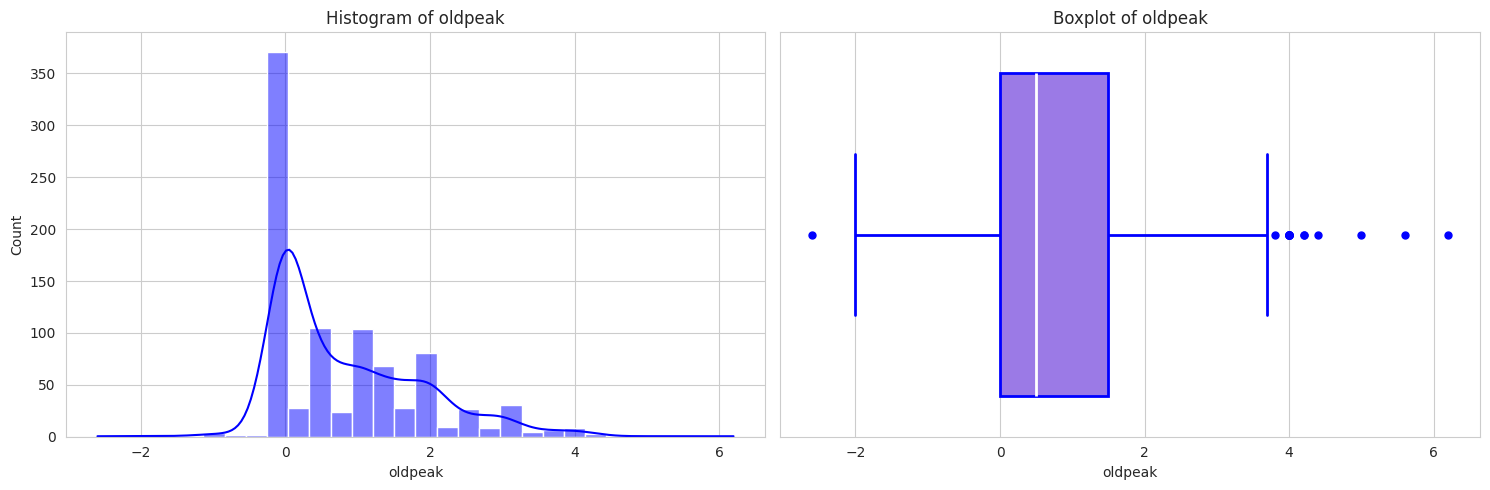

In [39]:
plot_histogram_and_boxplot(df, ['oldpeak'])

# 3.5. Discretizing the 'Oldpeak' Variable: Categorizing ST Depression for Heart Disease Analysis
As you can see, the oldpeak variable is right skewed. I will Address this skewness by categorizing 'Oldpeak' via Binning to mitigate its skewed distributions. I believe its an effective strategy. This approach not only simplifies the variable by grouping continuous data into discrete intervals, but also helps to minimize the influence of outliers and extreme values that can distort model training and statistical analysis. I will try both of the following binning techniques to see the results.

  * Quartile-based binning
  * Equal-width binning

# 3.5.1. Segmenting 'ST Depression - Oldpeak' Values into Quartile-Based Bins

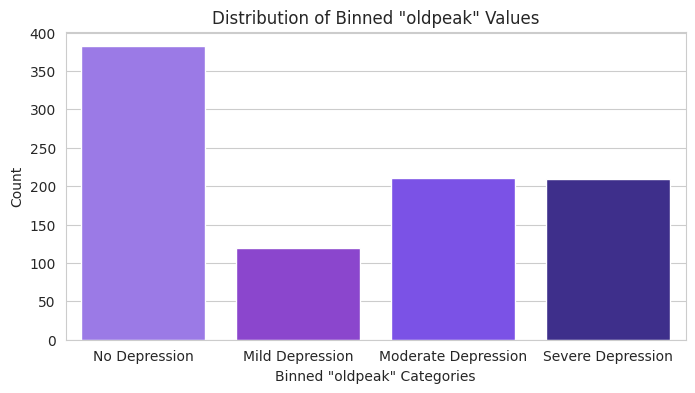

In [40]:
# Define bin edges according to the quartiles.
bin_edges = [-2.6, 0.0, 0.5, 1.5, 6.2]
shades = ['#9468F8', '#8B30E3', '#7039FF', '#341F9B', '#9556EB']
# Define labels for the bins.
bin_labels = ['No Depression', 'Mild Depression', 'Moderate Depression', 'Severe Depression']

# Bin the 'oldpeak' data.
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=bin_edges, labels=bin_labels, include_lowest=True)
oldpeak = df['oldpeak_binned']
df.drop('oldpeak_binned', axis=1, inplace=True)


# Plot the distribution of the binned data.
plt.figure(figsize=(8, 4))
sns.countplot(x=oldpeak, data=df, palette=shades)


plt.title('Distribution of Binned "oldpeak" Values')
plt.xlabel('Binned "oldpeak" Categories')
plt.ylabel('Count')

plt.show()

# 3.5.2. Strategizing 'ST depression - Oldpeak' levels through equal-width binning

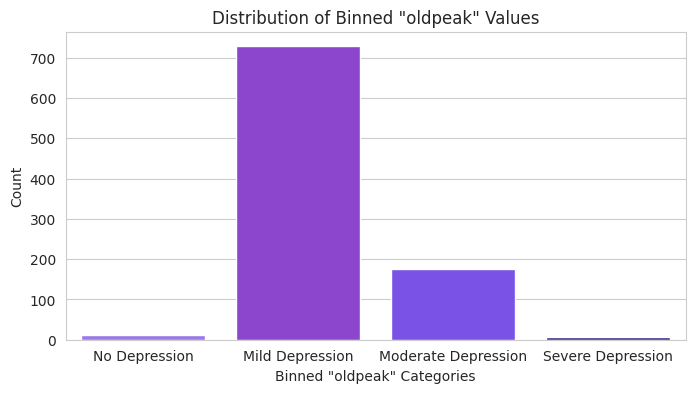

In [41]:
# Define the number of bins
number_of_bins = 4
max_oldpeak = df.oldpeak.max()
min_oldpeak = df.oldpeak.min()
# Calculate the range of the data (max - min)
data_range = max_oldpeak - min_oldpeak

# Calculate the bin width
bin_width = data_range / number_of_bins

# Generate the bin edges
bin_edges = [min_oldpeak + i * bin_width for i in range(number_of_bins + 1)]
# Define labels for the bins.
bin_labels = ['No Depression', 'Mild Depression', 'Moderate Depression', 'Severe Depression']

# Bin the 'oldpeak' data.
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['oldpeak'] = df['oldpeak_binned']
df.drop('oldpeak_binned', axis=1, inplace=True)


# Plot the distribution of the binned data.
plt.figure(figsize=(8, 4))
sns.countplot(x=df.oldpeak, data=df, palette=shades)


plt.title('Distribution of Binned "oldpeak" Values')
plt.xlabel('Binned "oldpeak" Categories')
plt.ylabel('Count')

plt.show()

In [42]:
print_heading('Observations from oldpeak binned')
df['oldpeak'].value_counts()

--------------------------------------------------
OBSERVATIONS FROM OLDPEAK BINNED
--------------------------------------------------


oldpeak
Mild Depression        728
Moderate Depression    175
No Depression           11
Severe Depression        6
Name: count, dtype: int64

# 3.6.  Visualizing data distribution with Histogram and Boxplot

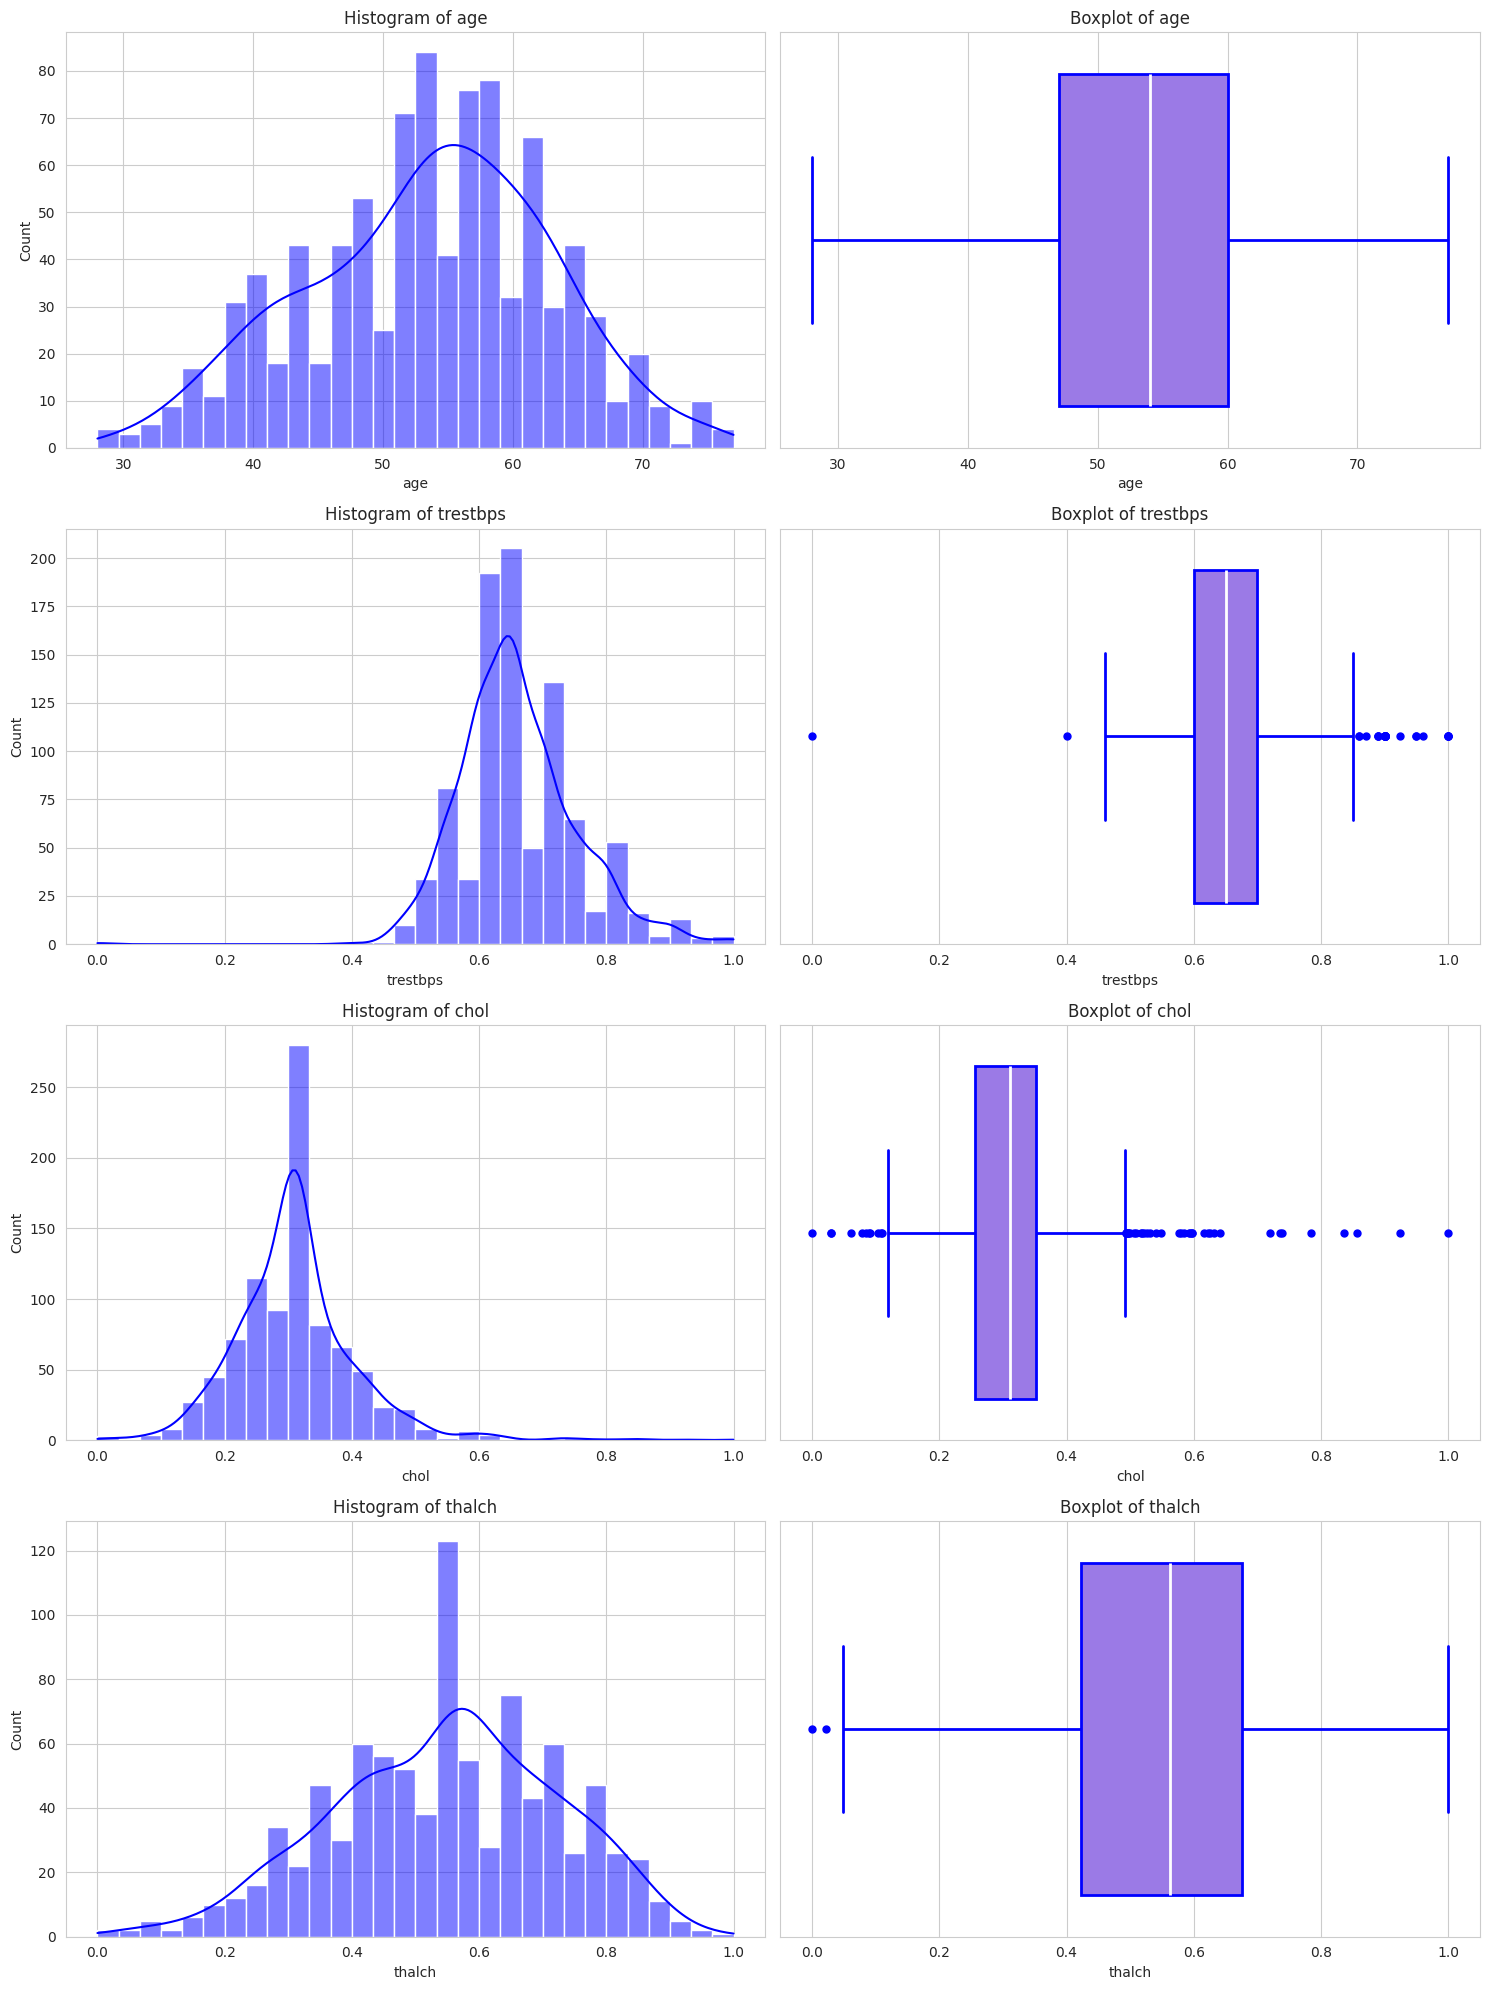

In [43]:
# Remove id and old peak column from numerical_cols
numerical_cols.remove('id')
numerical_cols.remove('oldpeak')


# Plot histogram and boxplot for numerical columns before scaling
plot_histogram_and_boxplot(df, numerical_cols)

# 3.7. Outlier Removal Using Interquartile Range

Outliers can significantly skew the results of a dataset, particularly in statistical analyses that assume a normal distribution of data. To address this, I've defined a function to detect and remove outliers within each numerical column of the DataFrame based on the `Interquartile Range (IQR)` method.

The function calculates the first (Q1) and third (Q3) quartiles, and the IQR (the difference between Q3 and Q1). It then determines the lower and upper bounds for acceptable data points. Values lying outside 1.5 times the IQR below Q1 or above Q3 are considered outliers and are removed from the dataset.

This cleaning process has been applied to each numerical column, with the exception of `'chol'`, which have been omitted from this outlier removal step. I will expain this in more in my next observation. By refining the dataset in this manner, we can potentially improve model accuracy, as the remaining data will be more representative of the underlying trend without the distortion from extreme values.

In [44]:

# custom class for outlier detection
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierDetector(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        # calculate the bounds for each column
        self.bounds_ = {}
        for column in X.columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            self.bounds_[column] = {
                'lower': Q1 - self.factor * IQR,
                'upper': Q3 + self.factor * IQR
            }
        return self

    def transform(self, X):
        # we flag the outliers in each column
        X_outliers = pd.DataFrame(index=X.index)
        for column in X.columns:
            lower_bound = self.bounds_[column]['lower']
            upper_bound = self.bounds_[column]['upper']
            X_outliers[column] = ~X[column].between(lower_bound, upper_bound)
        return X_outliers

# 3.9. How and why I have transformed the multilabel target variable into a binary classification problem?

In [45]:
# Get value count for the target variable
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [46]:
# Create a new column 'num_binary' in the dataframe 'df'. 
# If 'num' is greater than or equal to 2, 'num_binary' is 1, otherwise 0.
df['num_binary'] = df['num'].apply(lambda x:1 if x >= 2 else 0)

# Replace the 'num' column with the 'num_binary' column
df['num'] = df['num_binary']

# Drop the 'num_binary' column as it is no longer needed
df.drop('num_binary', axis=1, inplace=True)

In [47]:
# Get value count for the target variable
df['num'].value_counts()

num
0    676
1    244
Name: count, dtype: int64

### Strategy
The strategy above is converting the multi-level classification problem into a binary classification. In the original dataset, the `'num'` column contains values that represent different stages of heart disease. For the purpose of binary classification, these stages need to be simplified into a binary format: indicating the` presence (1) or absence (0)` of heart disease.

  * A new column 'num_binary' is created using the apply method on the 'num' column. The lambda function checks if the value in 'num' is greater than 0. If so, it indicates the presence of heart disease, and 'num_binary' is set to `(1)'detected'`. If not, 'num_binary' is set to `(0)'not detected'`, indicating no heart disease.
  * The original 'num' column is then replaced with the values from 'num_binary', effectively transforming the dataset into a binary classification format.
  * Lastly, the temporary 'num_binary' column is dropped from the dataframe using drop, as it is no longer needed after its values have been transferred to the 'num' column.

**WHY?**
The transformation of the 'num' column from a multiclass to a binary format in the heart disease dataset is driven by the objective to simplify the prediction task. The original 'num' column contains multiple stages of heart disease severity, which complicates the modeling process. By converting it into a binary format, we create a clear dichotomy: `(1)'detected'` for the presence of heart disease and `(0)'not detected'` for its absence. This binary classification aligns with clinical needs where the primary concern is often whether any heart disease is present rather than the specific severity level. It also improves the model's ability to generalize from the data, increases the interpretability of the model's predictions, and is likely to enhance performance metrics, as binary classification problems are typically easier to model than multiclass ones.

# 4.0 Training and Evaluating a Classifiers
Next, I'll utilize `Grid Search Cross Validation` to determine the optimal `hyperparameters`. After identifying these parameters, I'll proceed to train the classifier using the training dataset. Finally, I'll assess the classifier's performance on the evaluation dataset by employing the best estimator with its respective hyperparameters.

In [48]:
models = {
  'Logistic Regression': {
    'ID': 'LogisticRegression',
    'model': LogisticRegression(),
    'params': {
        'model__C': [1, 10],
        'model__penalty': ['l2'],
        'model__max_iter': [1000],
    },
},

'Support Vector Machine': {
    'ID': 'SVC',
    'model': SVC(),
    'params': {
        'model__C': [1, 10],
        'model__kernel': ['rbf'],
    },
},
   'AdaBoost Classifier': {
        'ID': 'AdaBoostClassifier',
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100]
        }
    },
  'XGBoost Classifier': {
    'ID': 'XGBClassifier',
    'model': XGBClassifier(),
    'params': {
        'model__max_depth': [3, 4],
        'model__learning_rate': [0.1, 0.2],
        'model__n_estimators': [50, 100],
        'model__gamma': [0, 0.1],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__reg_alpha': [0],
        'model__reg_lambda': [1],
    },
  },
  'Decision Tree Classifier': {
    'ID': 'DecisionTreeClassifier',
    'model': DecisionTreeClassifier(),
    'params': {
        'model__criterion': ['gini', 'entropy'],   
        'model__max_depth': [None, 3, 5, 10],       
        'model__max_features': [None, 'sqrt', 'log2']  
    },
},
'Random Forest Classifier': {
    'ID': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
    'params': {
        'model__n_estimators': [10, 50],
        'model__max_depth': [None, 3, 5],
        'model__min_samples_split': [2, 4],
        'model__min_samples_leaf': [1, 2],
    },
},
  'K-Nearest Neighbors': {
    'ID': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
    'params': {
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
},
'Gradient Boosting Classifier': {
    'ID': 'GradientBoostingClassifier',
    'model': GradientBoostingClassifier(),
    'params': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.1, 0.2],
        'model__max_depth': [3, 4],
        # 'model__min_samples_split': [2, 4],
        # 'model__min_samples_leaf': [1, 2],
        # 'model__subsample': [0.8, 1.0],
        'model__max_features': ['sqrt', 'log2', None]
    },
},
   'CatBoost Classifier': {
        'ID': 'CatBoostClassifier',
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'model__iterations': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }
    },
    'LGBM Classifier': {
        'ID': 'LGBMClassifier',
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },
    'GaussianNB': {
        'ID': 'GaussianNB',
        'model': GaussianNB(),
        'params': {}
    },

}

# 4.1. Stratified Sampling
Stratified sampling is a method of sampling that involves dividing a population into homogeneous subgroups, known as strata, and then randomly selecting samples from each stratum in proportions that represent the overall population. This technique ensures representation of all key subgroups within the sample, typically leading to more accurate and generalizable results.

# 4.1.1. Why am I using stratifies sampling? 
The purpose  is to evaluate and ensure that the feature distributions in both the training and test datasets are similar, particularly when using stratified sampling. This is done to maintain the representativeness of the test data and improve the generalizability of any predictive models trained on this data. 

# 4.1.2. Ensuring Representative Train-Test Splits through Stratified Sampling Based on Highly Correlated Features
I am using stratified sampling with the feature that has the highest correlation `(ca - number of major vessels)` with the correlation coefficient of `0.516216` to the target variable (`num - detection`) to ensure that the train-test split retains the proportional representation of that key feature, thereby maintaining the structure of the dataset and improving the validity of model evaluation. This approach helps to prevent sampling bias and results in more reliable and predictive performance metrics.

# 4.1.3. Class Representation Analysis

In [49]:
def calculate_error_ratio(df, target_column, feature_column, test_size=0.2, random_state=42, stratify=None ):

    # Define features and target
    X = df.drop([target_column], axis=1)  # Features
    y = df[target_column]  # Target

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=stratify, test_size=test_size, random_state=random_state)

    # Calculate the percentage representation of feature_column in training and test sets
    train_percentages = X_train[feature_column].value_counts(normalize=True)*100
    test_percentages = X_test[feature_column].value_counts(normalize=True)*100

    # Calculate the error ratio
    error_ratio = abs(train_percentages - test_percentages)

    # Create a dataframe to compare the percentages
    compare_percentages = pd.DataFrame({             
            "random_train %": train_percentages,
            "random_test %": test_percentages,
            "error_ratio %": error_ratio
            })

    # Print the representation of feature_column value in training and test sets before stratified sampling
    if stratify is None:
        print_heading(f'Representation of {feature_column} value in x_train and x_test before stratified Sampling'.upper())
    else:
        print_heading(f'Representation of {feature_column} value in x_train and x_test after stratified Sampling'.upper())
    compare_error_df = round(compare_percentages,2)
    return  X_train, X_test, y_train, y_test, compare_error_df

In [50]:

X_train, X_test, y_train, y_test, compare_error_df = calculate_error_ratio(df, 'num', 'ca')
compare_error_df

--------------------------------------------------
REPRESENTATION OF CA VALUE IN X_TRAIN AND X_TEST BEFORE STRATIFIED SAMPLING
--------------------------------------------------


,random_train %,random_test %,error_ratio %
ca,,,
0.000000,76.09,77.17,1.09
0.333333,13.72,13.04,0.68
0.666667,7.47,8.70,1.22
1.000000,2.72,1.09,1.63


In [51]:
X_train, X_test, y_train, y_test, compare_error_df = calculate_error_ratio(df, 'num', 'ca', stratify=df['ca'])
compare_error_df

--------------------------------------------------
REPRESENTATION OF CA VALUE IN X_TRAIN AND X_TEST AFTER STRATIFIED SAMPLING
--------------------------------------------------


,random_train %,random_test %,error_ratio %
ca,,,
0.000000,76.36,76.09,0.27
0.333333,13.59,13.59,0.00
0.666667,7.74,7.61,0.14
1.000000,2.31,2.72,0.41


# 4.2. Comparative Performance of Classification Models

In [52]:
%%time
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score

# Define a pipeline for numerical features with a QuantileTransformer
numerical_transformer  = Pipeline(steps=[
  # Apply QuantileTransformer to transform numerical features to a normal distribution
  #('quantile', QuantileTransformer(random_state=42, output_distribution='normal', n_quantiles=476)),
])

# Define a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
  transformers=[
    # Apply numerical_transformer pipeline to numerical columns
    ('num', numerical_transformer, numerical_cols),
    # Detect and handle outliers in numerical columns
    ('outliers', OutlierDetector(factor=1.5), numerical_cols),
    # Apply OneHotEncoder to categorical columns
    ('cat', OneHotEncoder(), categorical_cols)
  ]
)

# Initialize a list to store model performance metrics
model_scores = []
# Initialize a variable to store the best accuracy found
best_accuracy = 0
# Initialize a variable to store the best estimator
best_estimator = None
# Dictionary to store cross-validation results
cv_res = {}
# Placeholder for numerical columns list
numerical_cols
# Placeholder for the best features selected by SelectKBest
selected_k_best = None

# Iterate over the models dictionary to train and evaluate each model
for name, model in models.items():
  # Define feature selection step using mutual information criterion
  feature_selection = SelectKBest(mutual_info_classif, k=10)
  # Define the pipeline with preprocessing, feature selection, and the model
  pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('model', model['model'])
  ])

  # Combine model-specific parameters with feature selection parameters
  full_params = model['params']
  full_params.update({
      # Define grid search options for 'k' in feature selection
      'feature_selection__k': [3, 5, 8, 'all']  
    })

  # Initialize GridSearchCV with the current model's pipeline and parameters
  grid = GridSearchCV(pipeline, 
    param_grid=full_params,
    cv=5, verbose=0, n_jobs=-1)

  # Fit GridSearchCV to training data
  grid.fit(X_train, y_train)

  # Retrieve the best estimator from the grid search
  best_model = grid.best_estimator_

  # Predict on the test set using the best estimator
  y_pred = best_model.predict(X_test)

  # Calculate accuracy of the predictions
  accuracy = accuracy_score(y_test, y_pred)

  # Store performance metrics for the current model
  model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })
  
  # Update best_accuracy and best_estimator if current model is better
  if accuracy > best_accuracy:  
      best_accuracy = accuracy
      best_estimator = grid.best_estimator_
      # Store cross-validation results for the best model
      cv_res[name] = grid.cv_results_

# Sort the performance metrics of models in descending order of accuracy
sorted_models = sorted(model_scores, key=lambda x: x['Accuracy'], reverse=True)
# Convert sorted model performances into a DataFrame for display
metrics = pd.DataFrame(sorted_models)

# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

# Display classification models' performance metrics
print_heading("Classification Models Performance")
metrics.round(2)




ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py", line 990, in fit_transform
    self._validate_transformers()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py", line 530, in _validate_transformers
    raise TypeError(
TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. 'Pipeline(steps=[])' (type <class 'sklearn.pipeline.Pipeline'>) doesn't.


# 4.2.1. Plot the comparative performance of the classification models.

In [53]:
# Retrieve 'Model' column from the 'metrics' DataFrame
classifiers = metrics['Model']

# Retrieve 'Accuracy' column from the 'metrics' DataFrame
accuracy = metrics['Accuracy']

# sort accuracy in descending order but doesn't reassign to 'accuracy' variable
sorted_accuracy = accuracy.sort_values(ascending=False)

# Create a range of numbers equal to the number of models, to serve as y-axis positions
y = range(len(classifiers))

# Create a figure and a set of subplots with a specified figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Create horizontal bar plot with 'y' as the y-axis positions and 'accuracy' as the bar lengths
bars = ax.barh(y, sorted_accuracy, color='#9556EB')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_xlabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_yticks(y)
ax.set_yticklabels(classifiers)
ax.invert_yaxis()  # labels read top-to-bottom

# Add the data labels on the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else width - 0.05
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
            va='center', ha='right' if width > 0 else 'left', color='white')

fig.tight_layout()

plt.show()

NameError: name 'metrics' is not defined

# 4.2.2. What are the best selecter features by SelectKBest?

In [ ]:
# Extract the best features from the best estimator
extract_best_features = best_estimator.named_steps['feature_selection'].get_support()

# Get the names of the selected features
selected_features = [feature for bool, feature in zip(extract_best_features, numerical_cols + categorical_cols) if bool]

# Display the selected features
print_heading('Best Selected Features')
for feature in selected_features:
  print(f" - { feature.upper() }")

# 4.3. Best model split fold metrics

In [ ]:
# Extract the model step from the best estimator
best_model_step = best_estimator.get_params()['model']

# Get the class name of the model
best_model_class_name = best_model_step.__class__.__name__

# Initialize variables to hold the best model's name and number
selected_model_name = None
selected_model = None

# Iterate over all models
for model in models:
  # If the model's ID matches the best model's class name
 
  if models[model]['ID'] == best_model_class_name:
    # Set the selected model's name and number
    selected_model_name = best_model_class_name
    selected_model = model


In [ ]:
# Get the combined results from the selected model
combined_results = cv_res[selected_model]

# Define the columns to be used in the new DataFrame
columns = [ "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score", "mean_test_score"]

# Create an empty DataFrame with the defined columns
results_dataframe = pd.DataFrame({}, columns=columns)

# Populate the new DataFrame with the combined results
for column_index in range(len(columns)):
  results_dataframe[columns[column_index]] = combined_results[columns[column_index]]

# Rename the columns of the DataFrame
results_dataframe.columns = [ 'split0', 'split1', 'split2', 'split3', 'split4', 'accuracy']

# Sort the DataFrame based on accuracy in descending order
results_dataframe = results_dataframe.sort_values(by=['accuracy'], ascending=False)

# Name the index of the DataFrame as 'fold'
results_dataframe.index.name = 'fold'

# Drop any rows with missing values
round(results_dataframe.dropna(),2)

Observing the data, fold 6 demonstrates the highest average accuracy with approximately `78%`, suggesting that in this particular partitioning, the model performed best. On the other hand, fold 0 shows the lowest average accuracy of `74%`, which indicates some variability in the model's performance across different data splits. The individual split accuracies range from a low of `69%` (in split2 of fold 0) to a high of `82%` (in split0 of fold 1, 4, and 5), further highlighting this variability. This table is useful for identifying how stable the model's predictions are across different subsets of data and could be used to diagnose issues like overfitting to certain parts of the training data.

# 4.4. Applying Best Params to the Model

In [ ]:
# Set the parameters of the selected model to the parameters of the best estimator
estimator = models[selected_model]['model']
estimator.set_params(**best_estimator.get_params()['model'].get_params())

# 4.5. Get the best estimator parameters 

In [ ]:
# Get the params of the best estimator
best_model_params = best_estimator.get_params()['model'].get_params()

print_heading(f'Best Model Parameters for {selected_model}')
for params, value in best_model_params.items():
  print(f" - {params}: {value}")


# 4.6. Predicting Target Variable on a dummy data

In [ ]:
single_instance = X_train.sample(1, random_state=42)

# use the best estimator to predict the target variable
y_pred = best_estimator.predict(single_instance)

print_heading('Prediction'.upper())
y_pred[0]

# 5.0. Conclusion 

In conclusion, after applying a range of machine learning techniques to the multi-class classification problem at hand, I have successfully navigated through data preprocessing, model selection, and hyperparameter tuning to achieve satisfactory results. By converting the multi-class problem into a binary classification framework, I have streamlined the complexity of our predictive task, allowing for clear and actionable insights.

Stratified sampling has ensured that our models' training and validation were conducted on representative data subsets, maintaining the distribution of classes as much as possible and thus improving the generalizability of our results. The application of feature scaling and imputation of missing values has further enhanced model performance by providing a standardized dataset free of common data irregularities that could otherwise bias our predictive outcomes.

The computational constraints of the system were taken into consideration, and within these parameters, the hyperparameter tuning was meticulously carried out to optimize each model's performance. The results I believe, as tabulated, exhibit a commendable balance between accuracy, precision, recall, and F1 score across various algorithms, with `Support Vector Machine` leading the pack with an `accuracy of 0.85` and `Logistic Regression` with an `0.84` accuracy on second. This indicates a robust model that generalizes well to unseen data while maintaining high precision and recall.

It's also important to note the high precision score of `GaussianNB` and `Support Vector Machine`, which suggests that these models are particularly strong at minimizing false positives, a characteristic that could be crucial depending on the specific costs associated with errors in the application domain.

Overall, the results achieved are a testament to the efficacy of the methodologies employed, and they lay a solid foundation for future work. The next steps could involve more granular hyperparameter tuning, ensembling methods, or exploring deep learning techniques, depending on the project's evolution and the availability of computational resources. Additionally, it would be prudent to continually assess the models against new data to ensure that the performance metrics hold steady over time.